In [28]:
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [14]:
import os
import sys
module_path_lupft = '/home/glemieux/Repos/fates/tools/landuse/src/landusepft/'
sys.path.append(module_path_lupft)
from landusepftmod import ImportLandusePFTFile, ImportStaticLUH2File
from landusepftmod import RenormalizePFTs, AddLatLonCoordinates, DefineMask

In [25]:
def plotnatpft(variable, colormap='magma_r'):
    fg = variable.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=colormap, 
                   transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

    for ax in fg.axes.flat:
        ax.coastlines() 

    # color bar
    fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))
    plt.subplots_adjust(hspace=-0.65)

### Import data

In [15]:
luh2_static_file = '/home/glemieux/Data/luh2/staticData_quarterdeg.nc'
clm_surface_file = '/home/glemieux/Data/luh2/lu-pft/CLM5_current_surf_deg025.nc'
clm_forest_file = '/home/glemieux/Data/luh2/lu-pft/CLM5_current_luhforest_deg025.nc'
clm_pasture_file = '/home/glemieux/Data/luh2/lu-pft/CLM5_current_luhpasture_deg025.nc'
clm_other_file = '/home/glemieux/Data/luh2/lu-pft/CLM5_current_luhother_deg025.nc'
filelist = [clm_surface_file, clm_forest_file, clm_pasture_file, clm_other_file]

In [16]:
ds_landusepfts = []
for filename in filelist:
    ds_landusepfts.append(ImportLandusePFTFile(filename))

In [17]:
ds_static = ImportStaticLUH2File(luh2_static_file)

### Prep data

In [18]:
mask_static = DefineMask(ds_static)

In [19]:
for dataset in ds_landusepfts:
    AddLatLonCoordinates(dataset)

### Calculate bareground percentage

In [21]:
percent = []
percent_bareground = ds_landusepfts[0].PCT_NAT_PFT.isel(natpft=0)
percent_bareground = (percent_bareground / 100.0) * mask_static
percent.append(percent_bareground)

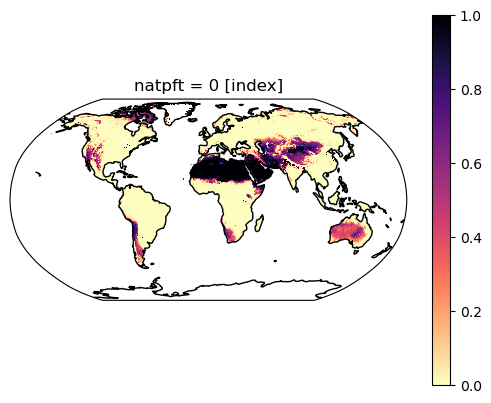

In [31]:
ax = plt.subplot(projection=ccrs.Robinson())
percent_bareground.plot(cmap='magma_r', transform=ccrs.PlateCarree())
ax.coastlines()

### Renormalize the PCT_NAT_PFT for each dataset using the mask

In [23]:
for data_array in ds_landusepfts:
    percent.append(RenormalizePFTs(data_array, mask_static))

### Calculate the primary and secondary PFT fractions as the forest

In [24]:
percent[2] = ds_static.fstnf * percent[2] + (1. - ds_static.fstnf) * percent[-1]

/tmp/ipykernel_77110/941046407.py:5: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fg.axes.flat:


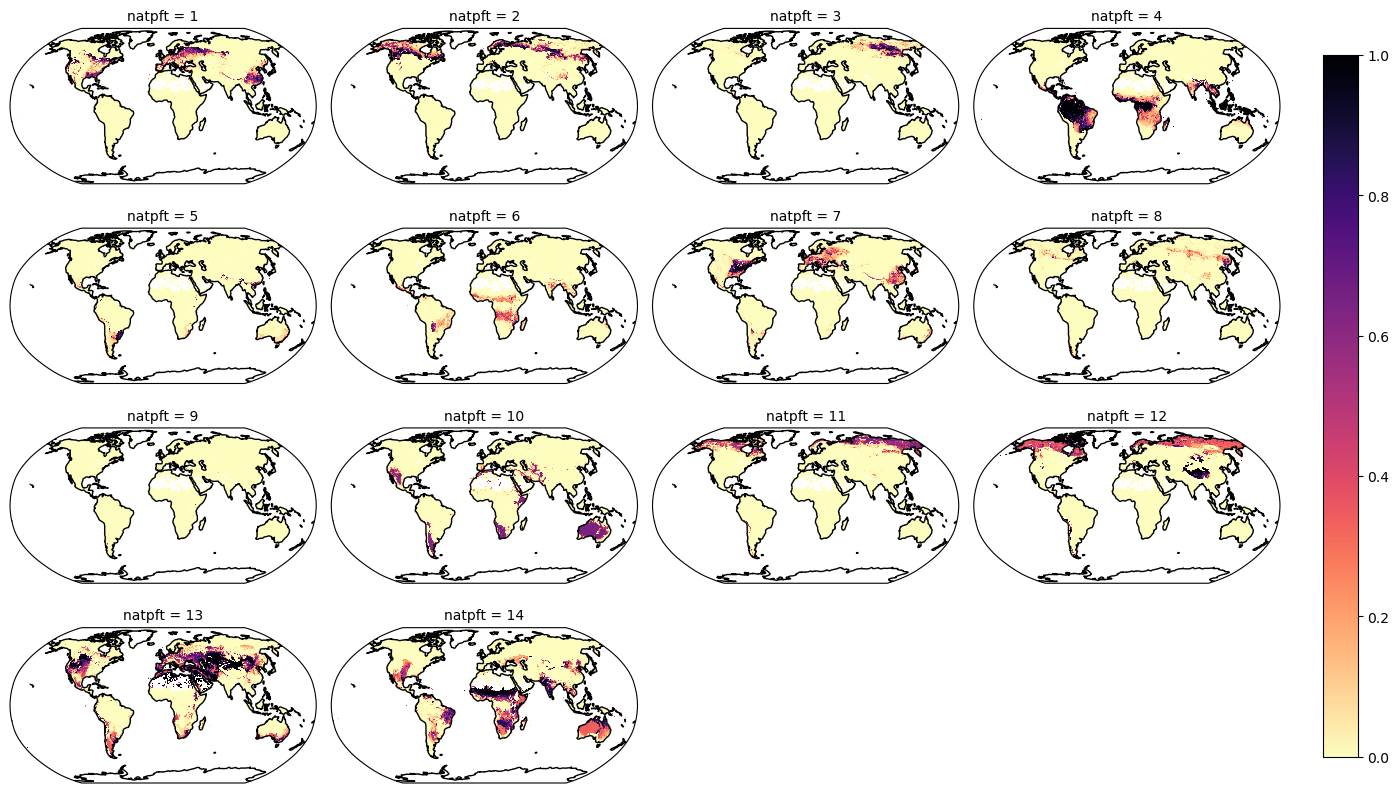

In [32]:
plotnatpft(percent[2])